In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal

## Creating a Synthetic Dataset

In [2]:
# define the number of points
n_samples = 100
mu1, sigma1 = -4, 1.2 # mean and variance
mu2, sigma2 = 4, 1.8 # mean and variance
mu3, sigma3 = 0, 1.6 # mean and variance

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)
x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples)

X = np.array(list(x1) + list(x2) + list(x3))
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (300,)


In [3]:
def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  s1 = 1/(np.sqrt(2*np.pi*variance))
  s2 = np.exp(-(np.square(data - mean)/(2*variance)))
  return s1 * s2

[]

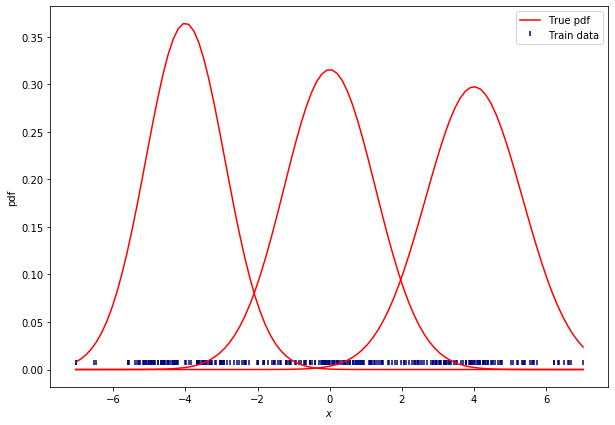

In [4]:
# visualize the training data
bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sigma1), color='red', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma2), color='red')
plt.plot(bins, pdf(bins, mu3, sigma3), color='red')

plt.legend()
plt.plot()

In [5]:
# define the number of clusters to be learned
k = 3
weights = np.ones((k)) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[-2.9618707   1.11704453  1.22175054] [0.29943358 0.51127968 0.90546439]


In [6]:
X = np.array(X)
print(X.shape)

(300,)


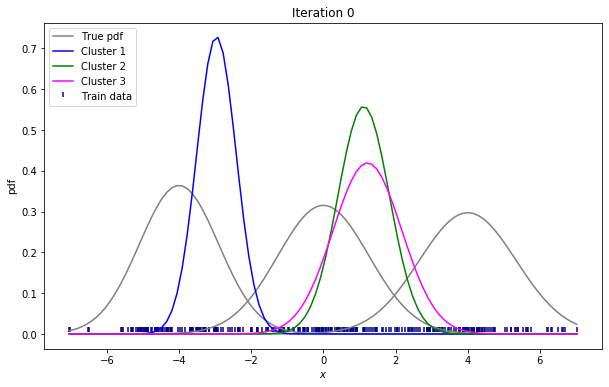

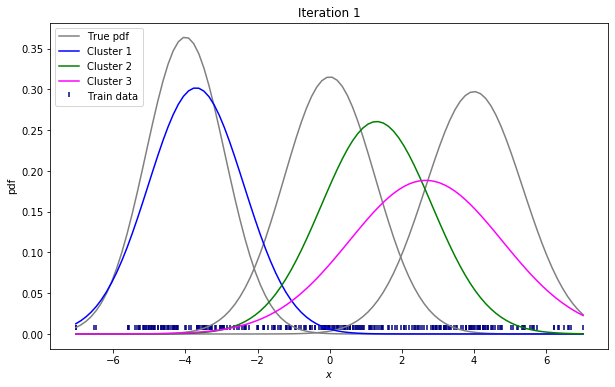

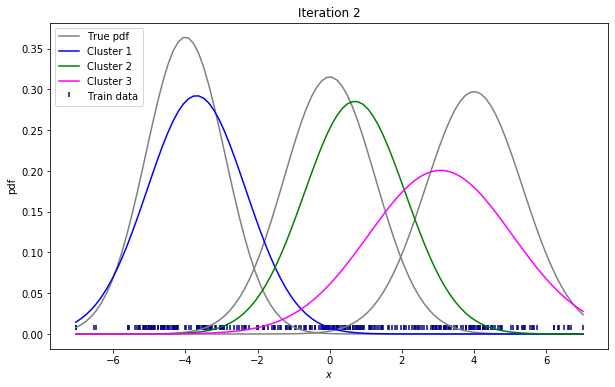

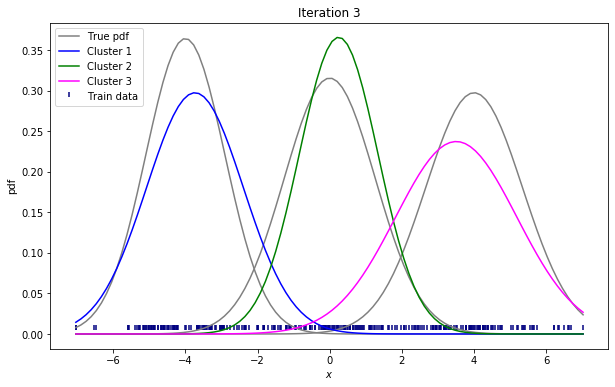

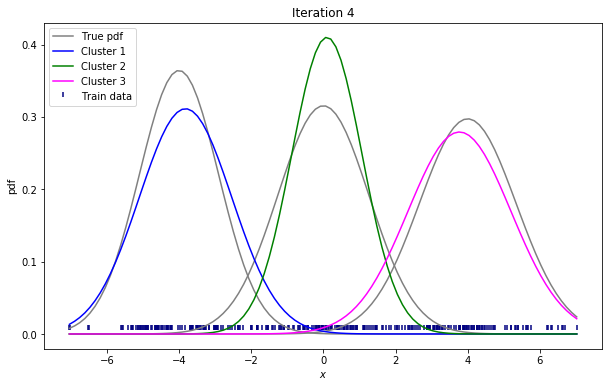

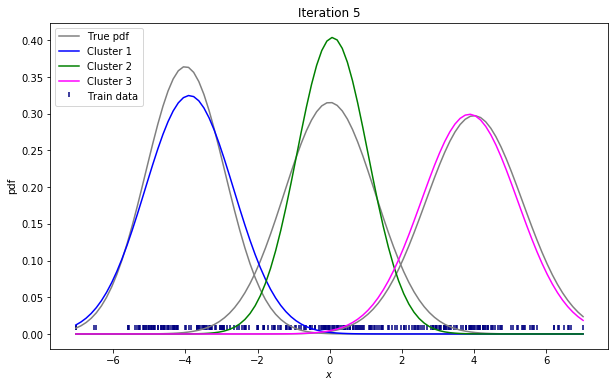

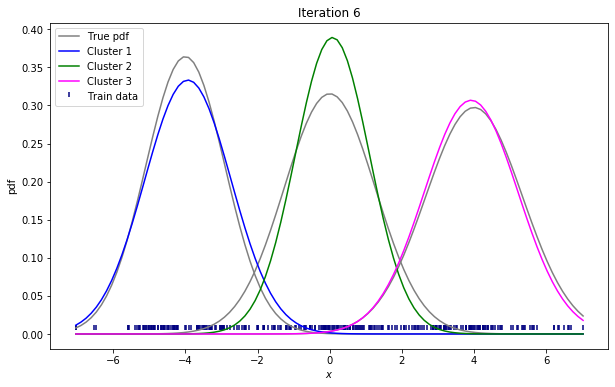

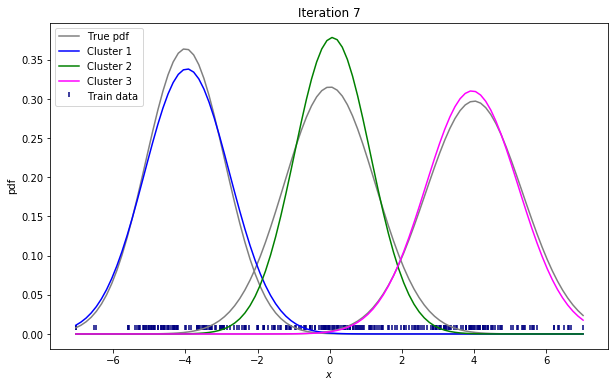

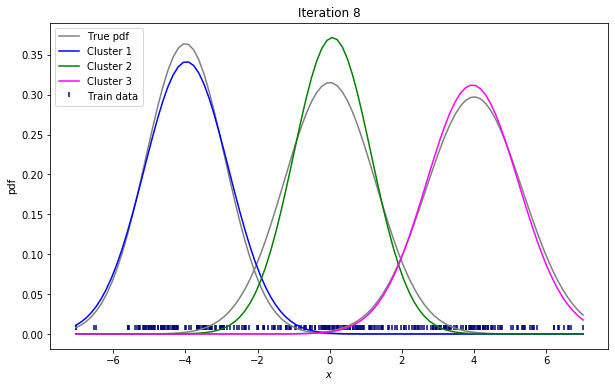

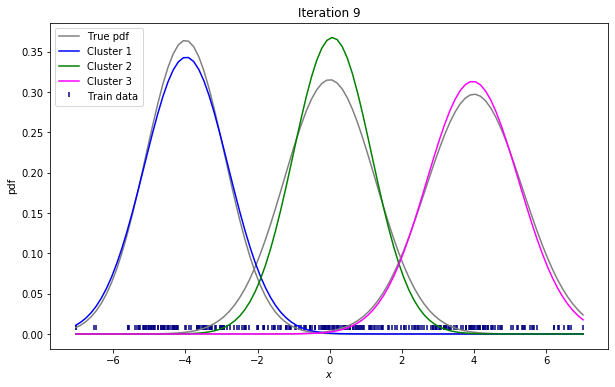

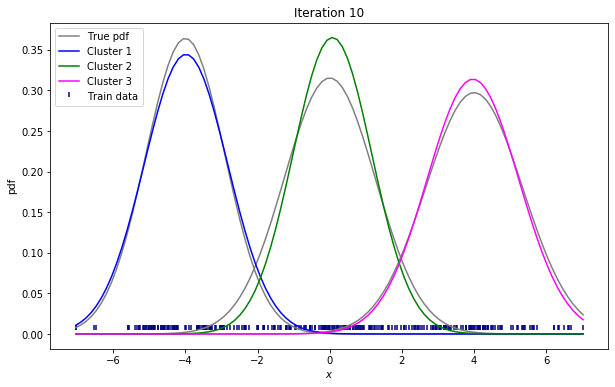

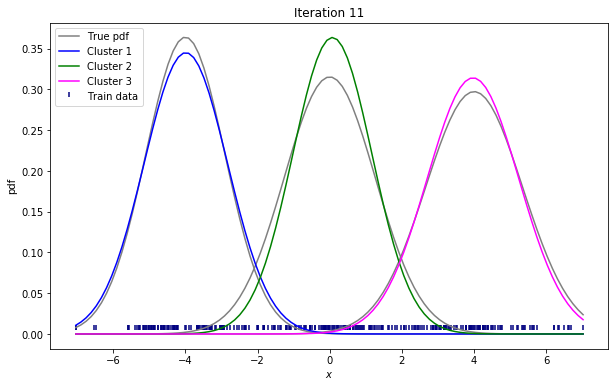

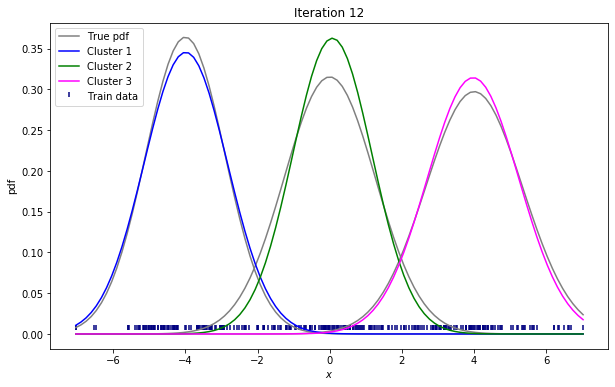

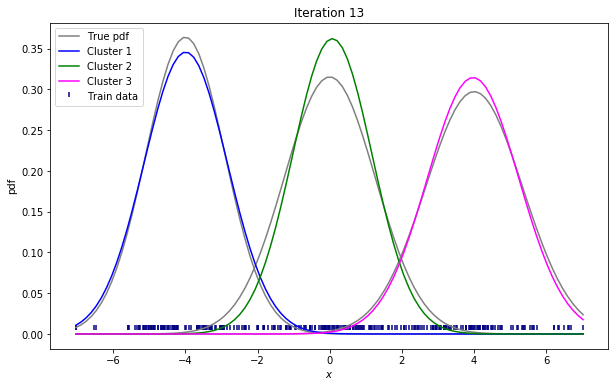

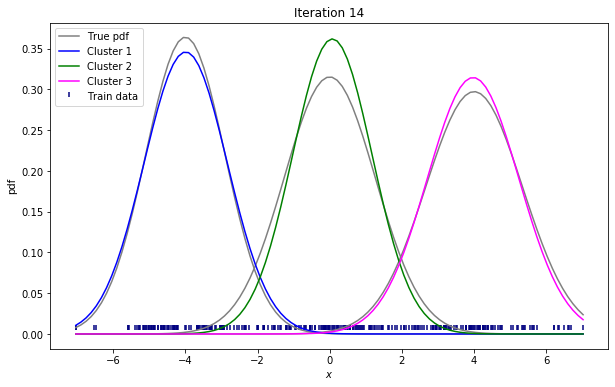

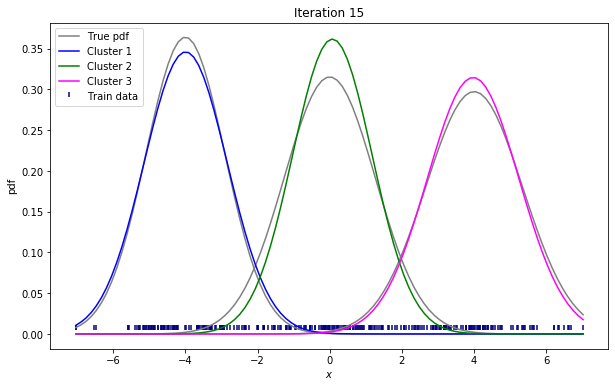

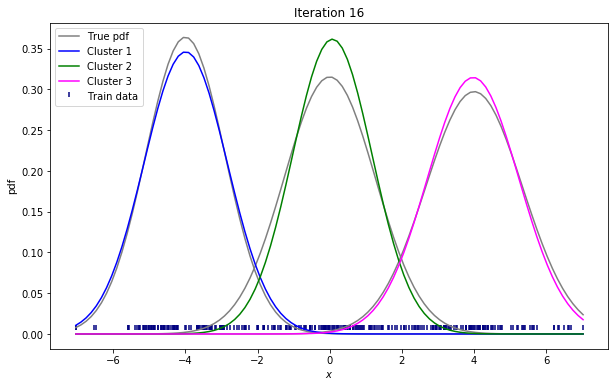

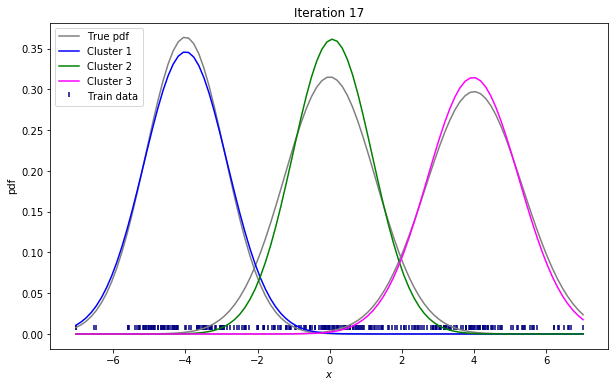

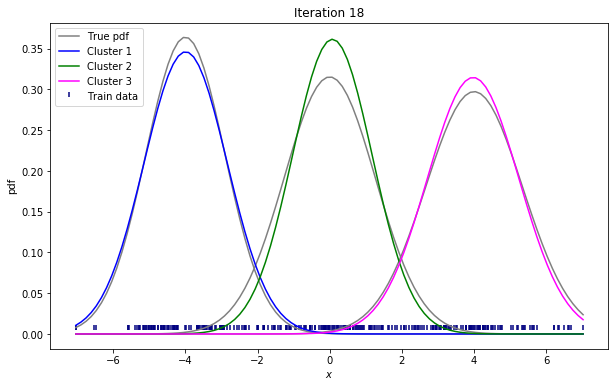

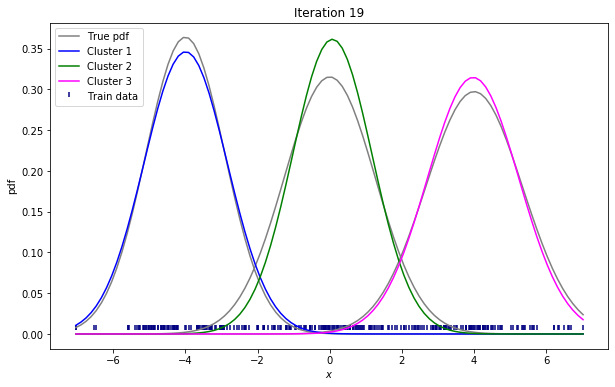

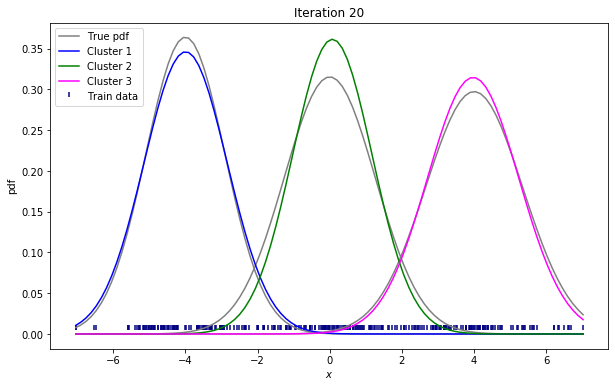

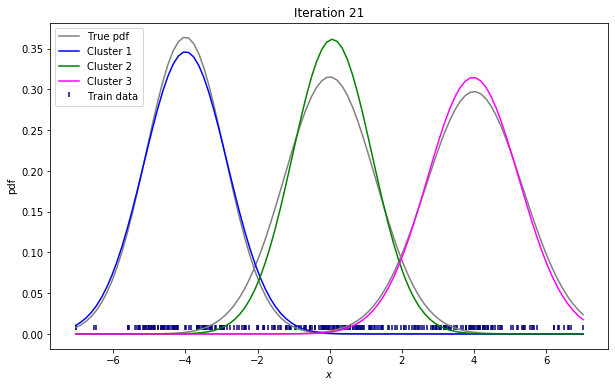

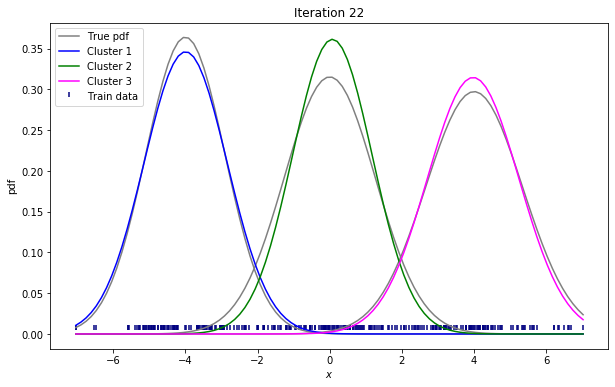

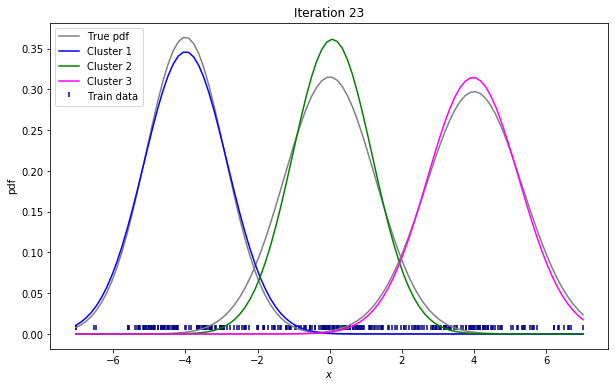

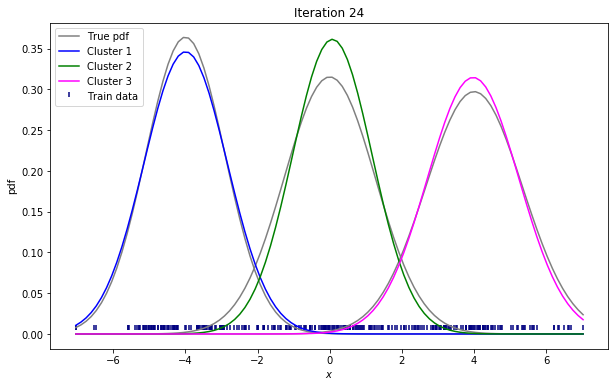

In [7]:
eps=1e-8
for step in range(25):
  
  if step % 1 == 0:
    plt.figure(figsize=(10,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

    plt.plot(bins, pdf(bins, mu1, sigma1), color='grey', label="True pdf")
    plt.plot(bins, pdf(bins, mu2, sigma2), color='grey')
    plt.plot(bins, pdf(bins, mu3, sigma3), color='grey')

    plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
    plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")
    plt.plot(bins, pdf(bins, means[2], variances[2]), color='magenta', label="Cluster 3")
    
    plt.legend(loc='upper left')
    
    plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
  
  # calculate the maximum likelihood of each observation xi
  likelihood = []
  

  # Expectation step
  for j in range(k):
    likelihood.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelihood = np.array(likelihood)
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian    
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))
  
    # updage mean and variance
    means[j] = np.sum(b[j] * X) / (np.sum(b[j]+eps))
    variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))
    
    # update the weights
    weights[j] = np.mean(b[j])